In [51]:
%matplotlib inline
%matplotlib widget
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

from lsst_efd_client import EfdClient

In [52]:
efd_client = EfdClient("summit_efd")

## Time from Russell in Slack Channel

Timestamp (TAI unix seconds): 1669244241.788

In [53]:
time = Time(1669851516.640, format='unix_tai', scale='tai')
time.format = 'fits'
print(time)

2022-11-30T23:38:36.640


Based on the above, use the following time period.

In [54]:
# Short time period 
#time_start = Time("2022-11-23T23:10:30", scale="utc", format="isot")
#time_end = Time("2022-11-23T23:11:00", scale="utc", format="isot")

# Long time period
time_start = Time("2022-11-30T23:38:36", scale="utc", format="isot")
time_end = Time("2022-11-30T23:43:36", scale="utc", format="isot")

In [63]:
# EFD data
data_elevation = await efd_client.select_time_series(
        "lsst.sal.MTMount.elevation",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

data_azimuth = await efd_client.select_time_series(
        "lsst.sal.MTMount.azimuth",
        fields=["timestamp", "actualPosition", "actualVelocity", "demandPosition", "demandVelocity"],
        start=time_start,
        end=time_end)

data_target = await efd_client.select_time_series(
        "lsst.sal.MTMount.logevent_target",
        fields=["elevation", "elevationVelocity", "azimuth", "azimuthVelocity", "taiTime"],
        start=time_start,
        end=time_end)

# Time period
timestamp_data = data_elevation.timestamp - data_elevation.timestamp[0]

Draw the demanded position in the following.
Do not care about the weird points at this moment.

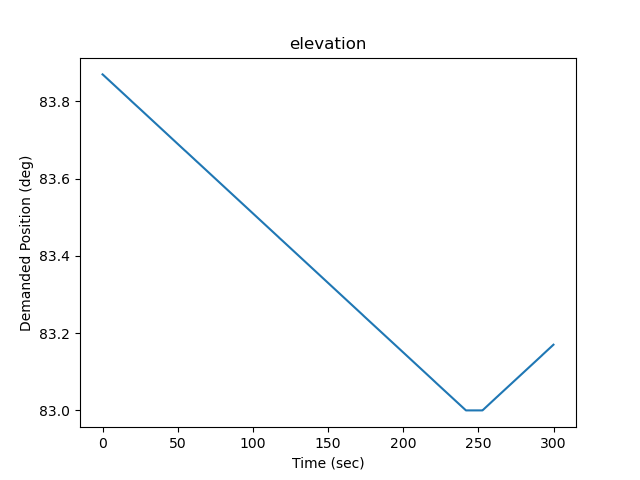

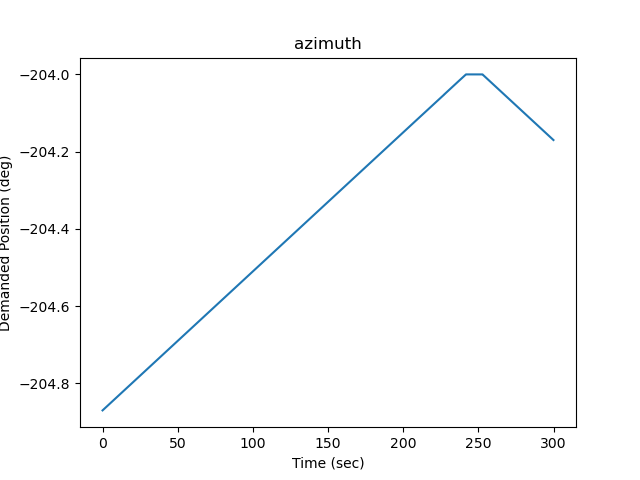

In [58]:
titles = ["elevation", "azimuth"]
demand_positions = [data_elevation.demandPosition, data_azimuth.demandPosition]
actualPositions = [data_elevation.actualPosition, data_azimuth.actualPosition]

for demand_position, actualPosition, title in zip(demand_positions, actualPositions, titles):
    plt.figure()
    #plt.plot(timestamp_data, actualPosition, 'r-')
    plt.plot(timestamp_data, demand_position)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Position (deg)")
    plt.show()

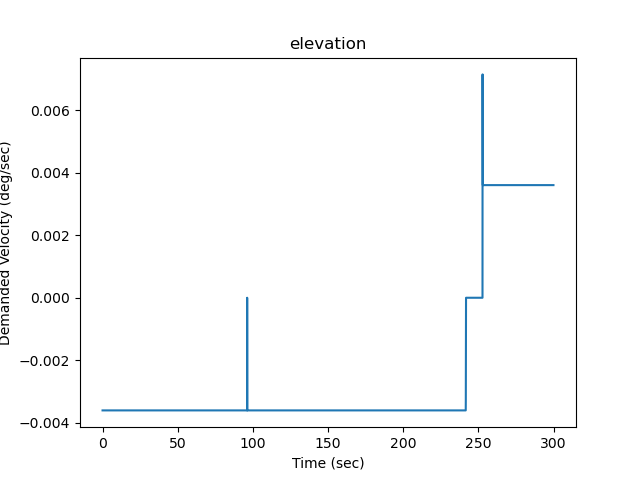

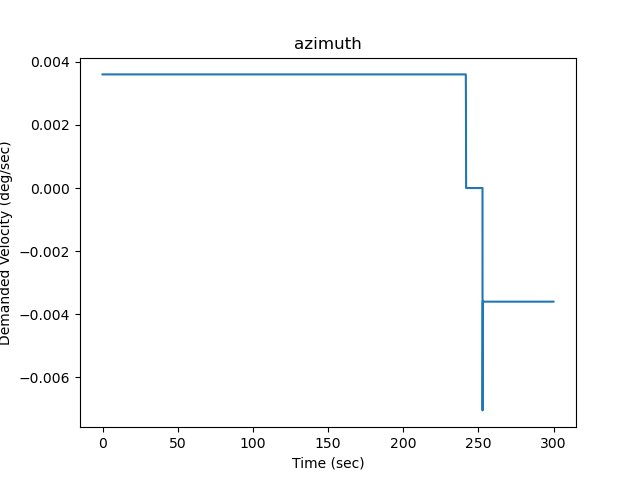

In [59]:
demand_velocities = [data_elevation.demandVelocity, data_azimuth.demandVelocity]
actual_velocities = [data_elevation.actualVelocity, data_azimuth.actualVelocity]

for demand_velocity, actual_velocity, title in zip(demand_velocities, actual_velocities, titles):
    plt.figure()
    #plt.plot(timestamp_data, actual_velocity, 'r-')
    plt.plot(timestamp_data, demand_velocity)
    plt.title(title)
    plt.xlabel("Time (sec)")
    plt.ylabel("Demanded Velocity (deg/sec)")
    plt.show()

It looks like the trajectory generator performs well if the tracking velocity is 0.1 deg/sec.
This is expected.

However, I thought that they should be 0.05 deg/sec and 0.025 deg/sec based on slack messages.

In [64]:
data_target

,elevation,elevationVelocity,azimuth,azimuthVelocity,taiTime
2022-11-30 23:38:36.030142+00:00,83.869004,-0.0036,-204.869004,0.0036,1.669852e+09
2022-11-30 23:38:36.080729+00:00,83.868821,-0.0036,-204.868821,0.0036,1.669852e+09
2022-11-30 23:38:36.126812+00:00,83.868638,-0.0036,-204.868638,0.0036,1.669852e+09
2022-11-30 23:38:36.181403+00:00,83.868455,-0.0036,-204.868455,0.0036,1.669852e+09
2022-11-30 23:38:36.230262+00:00,83.868272,-0.0036,-204.868272,0.0036,1.669852e+09
...,...,...,...,...,...
2022-11-30 23:43:35.753572+00:00,83.170344,0.0036,-204.170344,-0.0036,1.669852e+09
2022-11-30 23:43:35.803221+00:00,83.170527,0.0036,-204.170527,-0.0036,1.669852e+09
2022-11-30 23:43:35.854985+00:00,83.170710,0.0036,-204.170710,-0.0036,1.669852e+09
2022-11-30 23:43:35.901429+00:00,83.170891,0.0036,-204.170891,-0.0036,1.669852e+09


In [65]:
type(data_target)

pandas.core.frame.DataFrame

In [66]:
data_target.to_csv("target.csv")

In [67]:
data_elevation.to_csv("elevation_demanded_measurement.csv")

In [69]:
data_azimuth.to_csv("azimuth_demanded_measurement.csv")